# 단순 선형회귀

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
    

### 아버지와 아들의 키 - Galton

In [25]:
df = pd.read_csv('http://www.randomservices.org/random/data/Galton.txt', sep='\t')
df.head()

,Family,Father,Mother,Gender,Height,Kids
0,1,78.5,67.0,M,73.2,4
1,1,78.5,67.0,F,69.2,4
2,1,78.5,67.0,F,69.0,4
3,1,78.5,67.0,F,69.0,4
4,2,75.5,66.5,M,73.5,4


- 아버지와 아들의 키만 발췌

In [20]:
# 필터링
df = df[df.Gender == 'M']
# selection
df = df[['Father', 'Height']]
df

,Father,Height
0,78.5,73.2
4,75.5,73.5
5,75.5,72.5
8,75.0,71.0
10,75.0,70.5
...,...,...
890,68.5,72.0
891,68.5,70.5
892,68.5,68.7
893,68.5,68.5


In [26]:
# Filtering, selection 한줄처리
df = df[df.Gender == 'M'][['Father', 'Height']]
df.head(3)

,Father,Height
0,78.5,73.2
4,75.5,73.5
5,75.5,72.5


In [27]:
# 'height' 컬럼을 'Son'으로 변경
df.rename(columns={'Height':'Son'}, inplace=True)
df.head(3)

,Father,Son
0,78.5,73.2
4,75.5,73.5
5,75.5,72.5


In [28]:
# inch를 cm로
df = df * 2.54
df.head()

,Father,Son
0,199.39,185.928
4,191.77,186.690
5,191.77,184.150
8,190.50,180.340
10,190.50,179.070


- 산점도 그리기

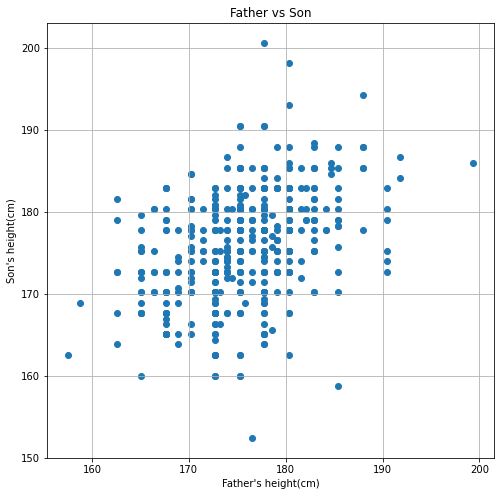

In [31]:
plt.figure(figsize=(8,8))
plt.scatter(df.Father, df.Son)
plt.grid()
plt.xlabel("Father's height(cm)")
plt.ylabel("Son's height(cm)")
plt.title("Father vs Son")
plt.show()

- 회귀선 구하기: Numpy polyfit

In [34]:
fp1 = np.polyfit(df.Father, df.Son, 1)      # 1차식으로 아버지와 아들의 키 관계 표현하기
fp1

array([ 0.44774792, 97.17763701])

In [36]:
x = np.array([156,201])
y = fp1[0]*x + fp1[1]
y

array([167.02631215, 187.17496845])

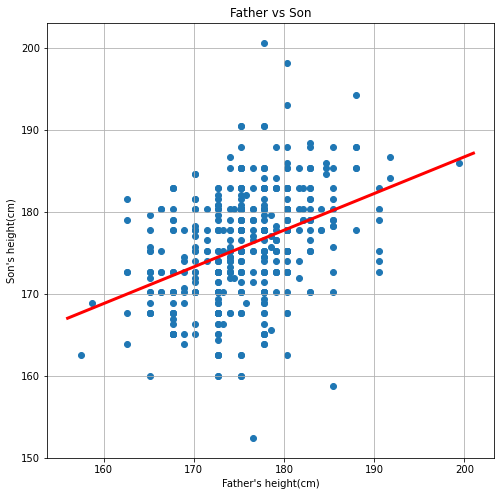

In [37]:
plt.figure(figsize=(8,8))
plt.scatter(df.Father, df.Son)
plt.plot(x,y, 'r-', lw=3)
plt.grid()
plt.xlabel("Father's height(cm)")
plt.ylabel("Son's height(cm)")
plt.title("Father vs Son")
plt.show()

- Scikit-Learn

In [38]:
from sklearn.linear_model import LinearRegression

In [44]:
# X의 shape 1차원 --> 2차원으로 바꿔 주어야 함
df.Father.values.shape

(465,)

In [43]:
lr = LinearRegression()
lr.fit(df.Father.values.reshape(-1, 1), df.Son.values)

LinearRegression()

In [46]:
# 기울기
lr.coef_

array([0.44774792])

In [47]:
# 절편
lr.intercept_

97.17763700739346

In [48]:
# 잔차 제곱의 합 (RSS: Residual Sum of Square)
lr._residues

17556.59951549399

In [50]:
# R squared = 성능 평가 요소
lr.score(df.Father.values.reshape(-1, 1), df.Son.values)

0.15312927478306992

In [51]:
from sklearn.metrics import r2_score